In [51]:
from sklearn.datasets import make_regression
import numpy as np
import pandas as pd
%matplotlib notebook
from matplotlib import pyplot as plt
import scipy.stats

# Visualitzarem només 3 decimals per mostra
pd.set_option('display.float_format', lambda x: '%.3f' % x)

# Funcio per a llegir dades en format csv
def load_dataset(path):
    dataset = pd.read_csv(path, header=0, delimiter=',')
    return dataset

# Carreguem dataset d'exemple
dataset = load_dataset('Brain Tumor.csv')
data = dataset.values

df = pd.DataFrame(dataset)

x = data[:, :14]
y = data[:, 14]
print("Dimensionalitat de la BBDD:", dataset.shape)
print("Dimensionalitat de les entrades X", x.shape)
print("Dimensionalitat de l'atribut Y", y.shape)

Dimensionalitat de la BBDD: (3762, 15)
Dimensionalitat de les entrades X (3762, 14)
Dimensionalitat de l'atribut Y (3762,)


In [52]:
df

,Image,Class,Mean,Variance,Standard Deviation,Entropy,Skewness,Kurtosis,Contrast,Energy,ASM,Homogeneity,Dissimilarity,Correlation,Coarseness
0,Image1,0,6.535,619.588,24.892,0.109,4.276,18.901,98.614,0.293,0.086,0.531,4.473,0.982,0.000
1,Image2,0,8.750,805.958,28.389,0.267,3.718,14.465,63.859,0.475,0.226,0.651,3.220,0.989,0.000
2,Image3,1,7.341,1143.808,33.820,0.001,5.062,26.480,81.867,0.032,0.001,0.268,5.982,0.978,0.000
3,Image4,1,5.958,959.712,30.979,0.001,5.678,33.429,151.230,0.032,0.001,0.244,7.701,0.964,0.000
4,Image5,0,7.315,729.541,27.010,0.147,4.283,19.079,174.989,0.344,0.118,0.501,6.835,0.973,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3757,Image3758,0,21.235,1208.850,34.769,0.064,2.082,4.647,158.438,0.221,0.049,0.487,5.212,0.951,0.000
3758,Image3759,0,20.435,1227.151,35.031,0.067,2.145,4.882,161.159,0.226,0.051,0.503,5.083,0.953,0.000
3759,Image3760,0,18.012,1151.583,33.935,0.068,2.308,5.579,167.130,0.229,0.052,0.492,5.104,0.952,0.000
3760,Image3761,0,13.330,945.733,30.753,0.088,2.733,7.758,223.813,0.262,0.068,0.480,6.440,0.941,0.000


0 = NO TUMOR  
1 = TUMOR

In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3762 entries, 0 to 3761
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Image               3762 non-null   object 
 1   Class               3762 non-null   int64  
 2   Mean                3762 non-null   float64
 3   Variance            3762 non-null   float64
 4   Standard Deviation  3762 non-null   float64
 5   Entropy             3762 non-null   float64
 6   Skewness            3762 non-null   float64
 7   Kurtosis            3762 non-null   float64
 8   Contrast            3762 non-null   float64
 9   Energy              3762 non-null   float64
 10  ASM                 3762 non-null   float64
 11  Homogeneity         3762 non-null   float64
 12  Dissimilarity       3762 non-null   float64
 13  Correlation         3762 non-null   float64
 14  Coarseness          3762 non-null   float64
dtypes: float64(13), int64(1), object(1)
memory usage: 441.0

In [54]:
print("Per comptar el nombre de valors no existents:")
print(df.isnull().sum())

Per comptar el nombre de valors no existents:
Image                 0
Class                 0
Mean                  0
Variance              0
Standard Deviation    0
Entropy               0
Skewness              0
Kurtosis              0
Contrast              0
Energy                0
ASM                   0
Homogeneity           0
Dissimilarity         0
Correlation           0
Coarseness            0
dtype: int64


<IPython.core.display.Javascript object>


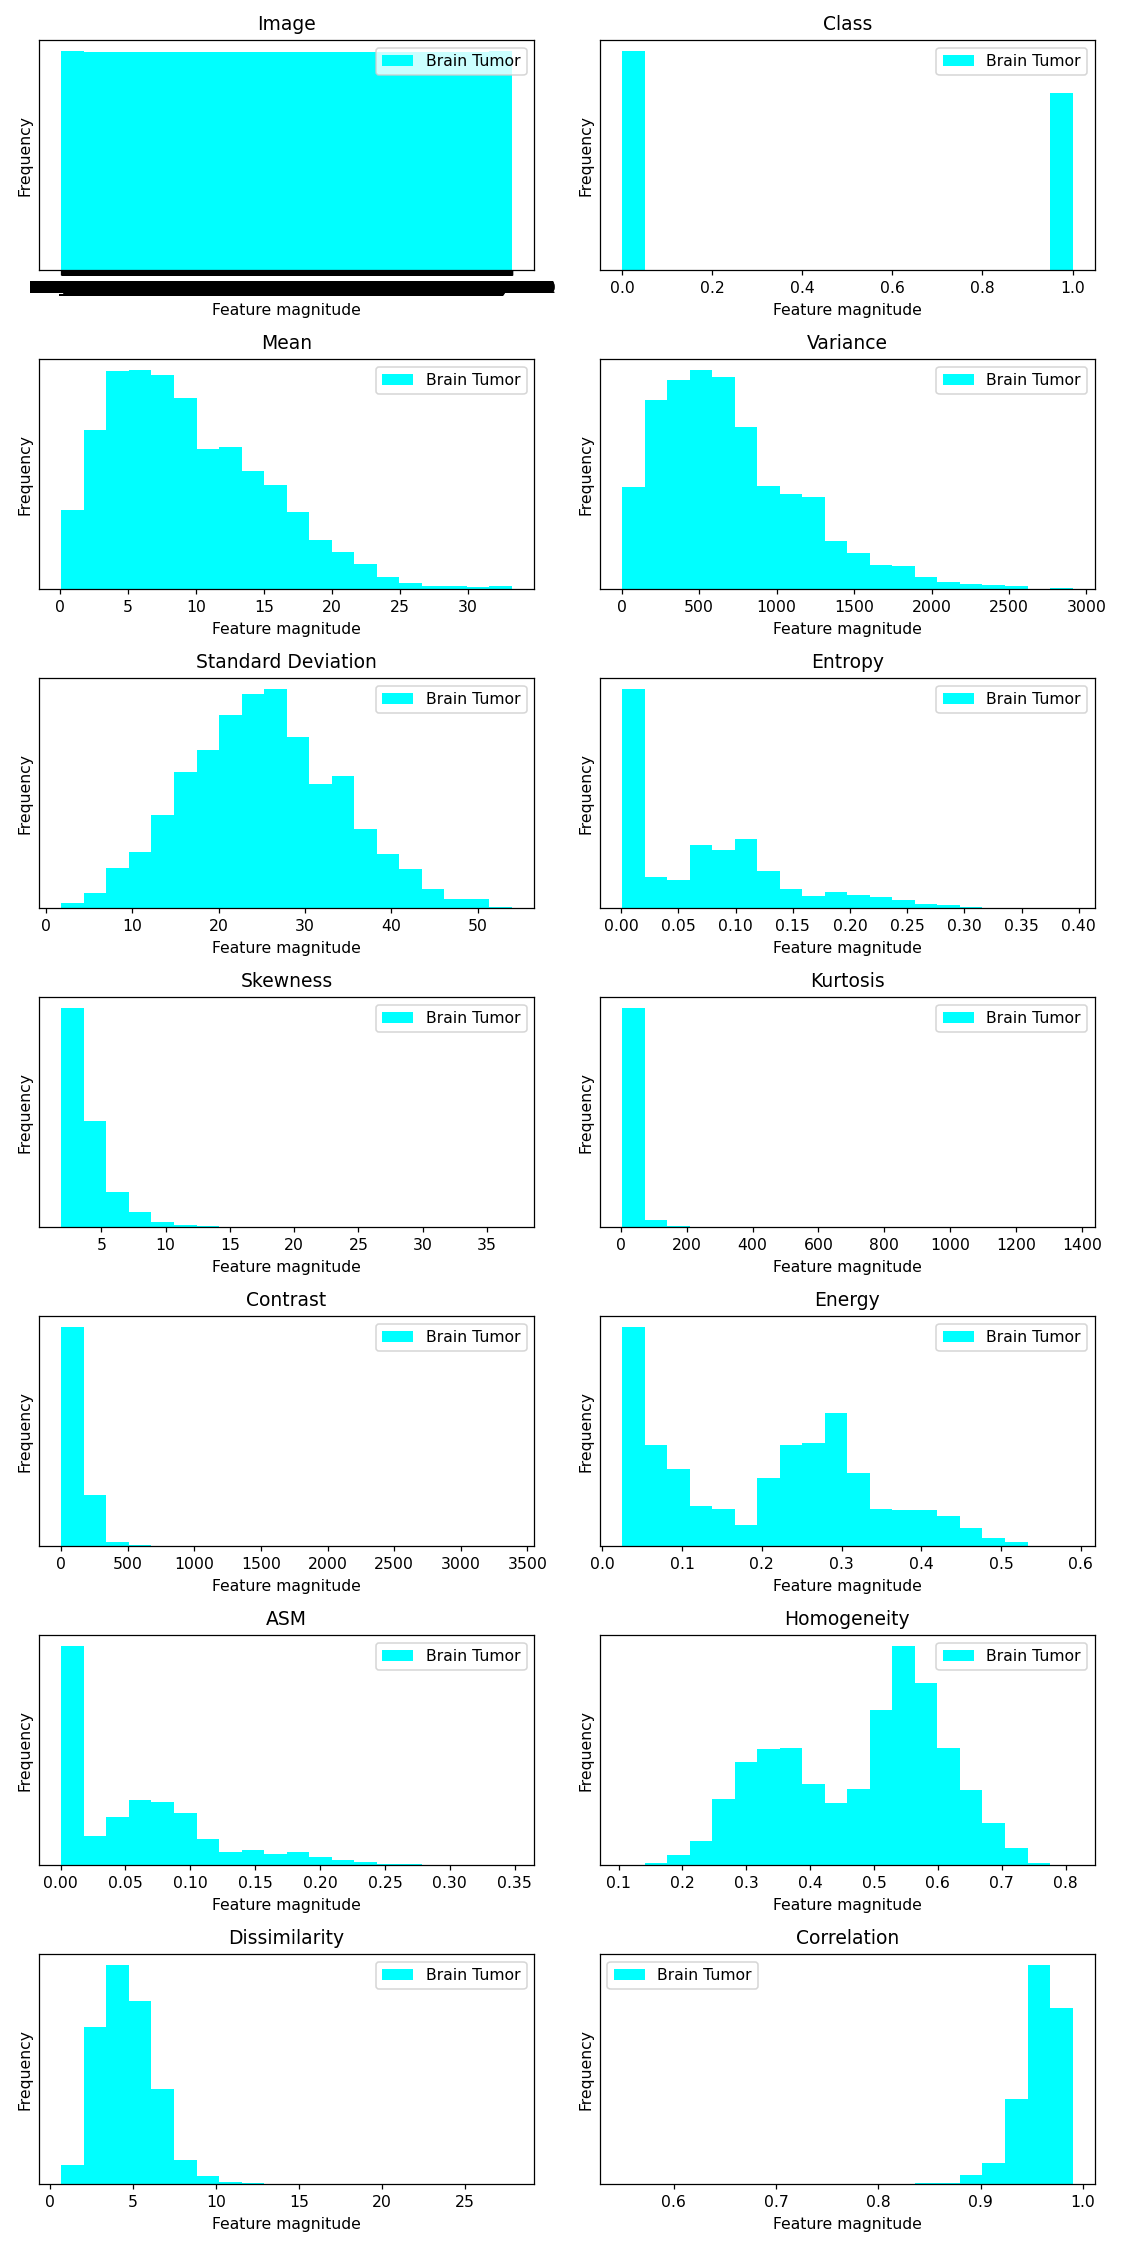

In [65]:
import mglearn 
fig, axes = plt.subplots(7,2,figsize=(10,20))
ax = axes.ravel()

for i in range(14):
    ax[i].hist(df.iloc[:,i], bins=20, color = 'cyan')
    ax[i].set_title(list(df)[i])
    ax[i].set_yticks(())
    ax[i].set_xlabel("Feature magnitude")
    ax[i].set_ylabel("Frequency")
    ax[i].legend(["Brain Tumor"], loc="best")

fig.tight_layout()

<IPython.core.display.Javascript object>


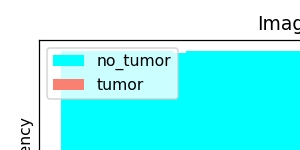

In [66]:
tumor = df.loc[df['Class']==1]
no_tumor = df.loc[df['Class']==0]



fig, axes = plt.subplots(7,2,figsize=(10,20))
ax = axes.ravel()

for i in range(14):
    ax[i].hist(no_tumor.iloc[:,i], bins=20, color = 'cyan')
    ax[i].hist(tumor.iloc[:,i], bins=20, color = 'salmon')
    ax[i].set_title(list(df)[i])
    ax[i].set_yticks(())
    ax[i].set_xlabel("Feature magnitude")
    ax[i].set_ylabel("Frequency")
    ax[i].legend(["no_tumor", "tumor"], loc="best")

fig.tight_layout()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>


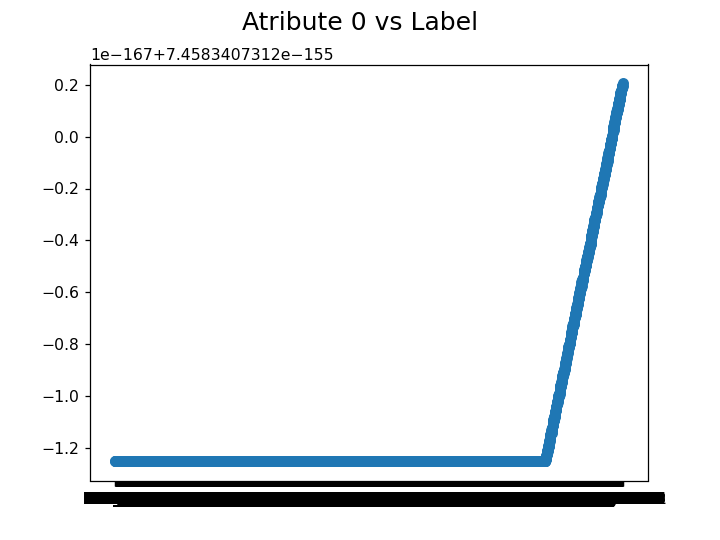

<IPython.core.display.Javascript object>


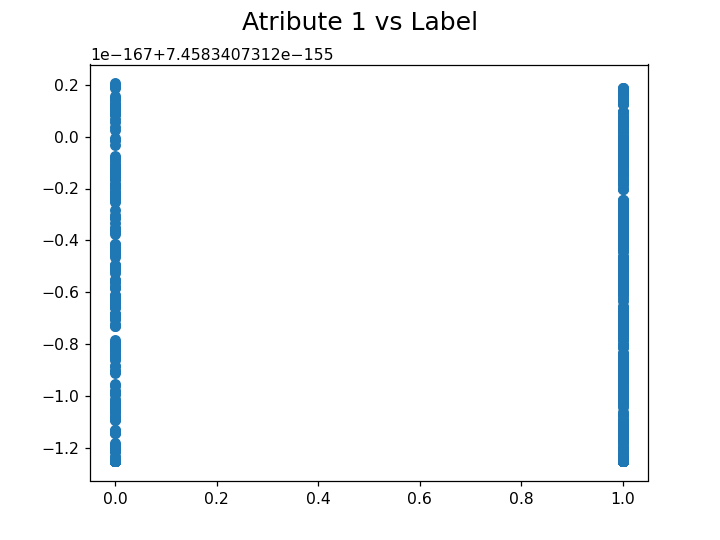

<IPython.core.display.Javascript object>


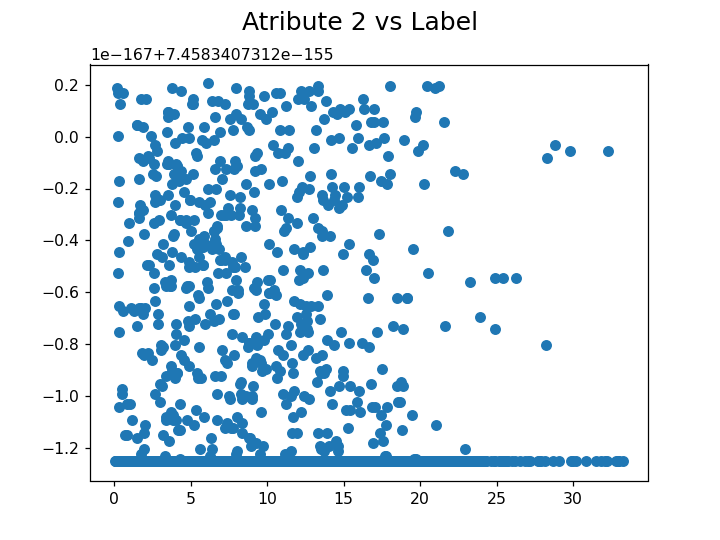

<IPython.core.display.Javascript object>


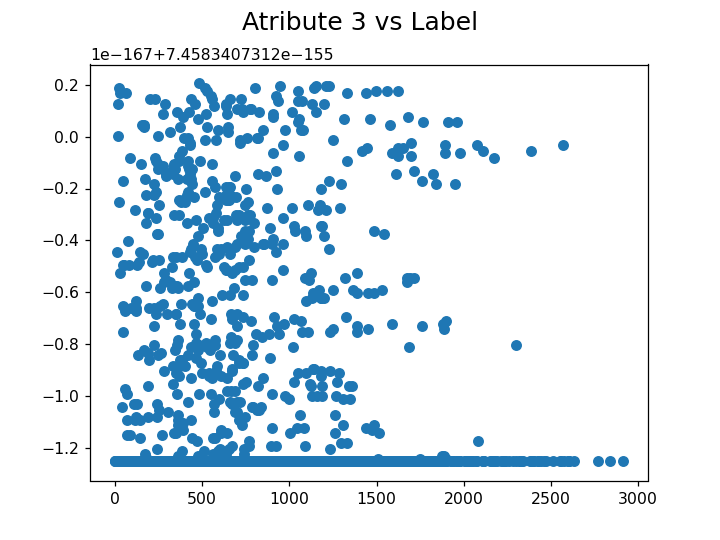

<IPython.core.display.Javascript object>


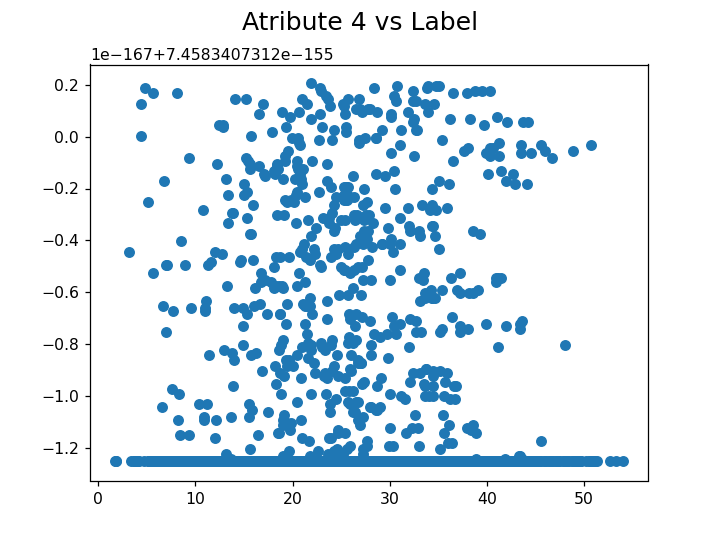

<IPython.core.display.Javascript object>


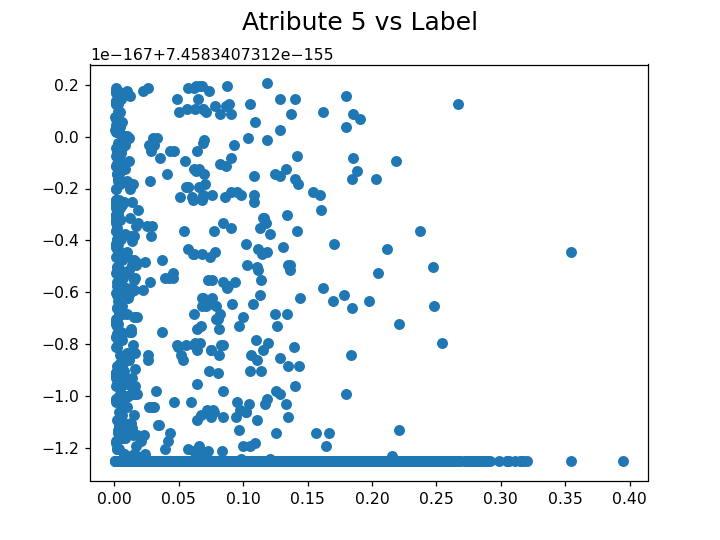

<IPython.core.display.Javascript object>


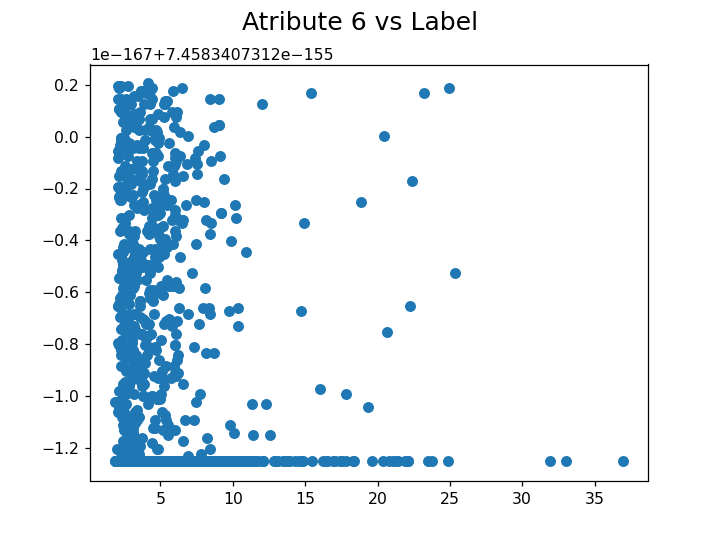

<IPython.core.display.Javascript object>


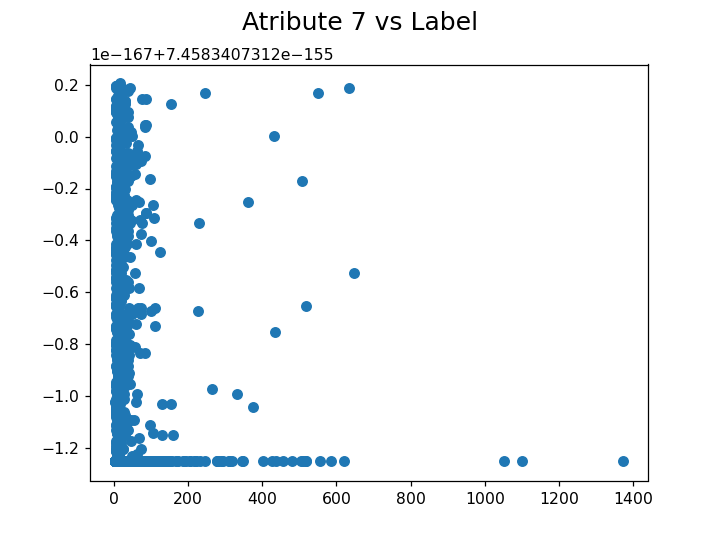

<IPython.core.display.Javascript object>


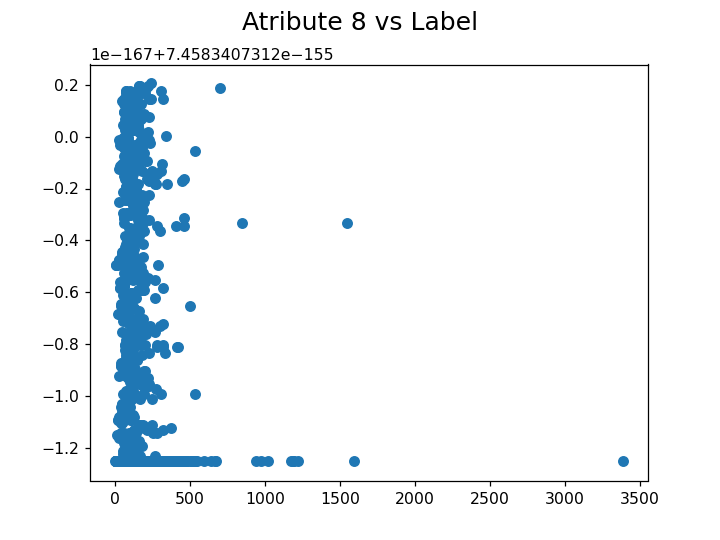

<IPython.core.display.Javascript object>


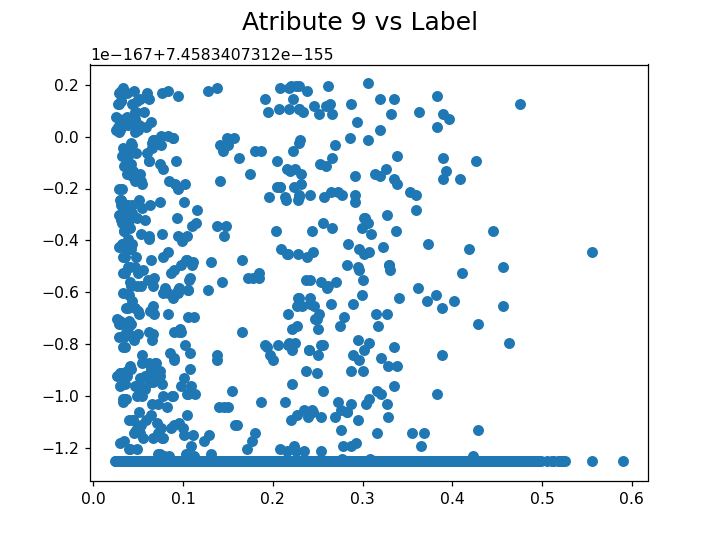

<IPython.core.display.Javascript object>


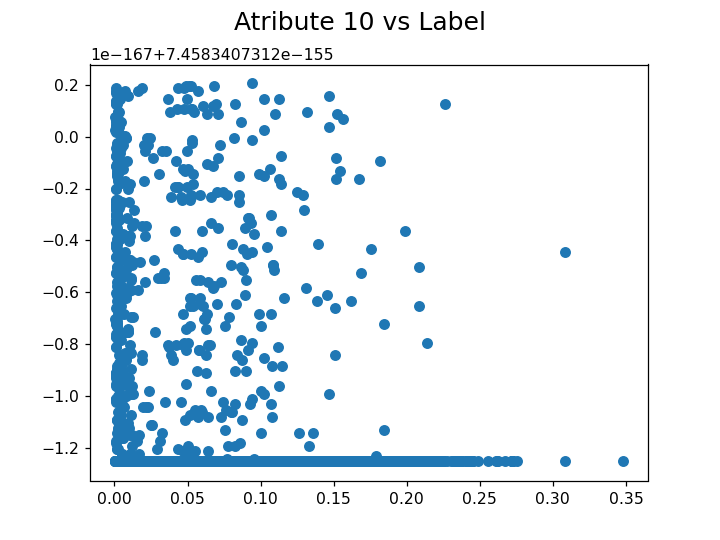

<IPython.core.display.Javascript object>


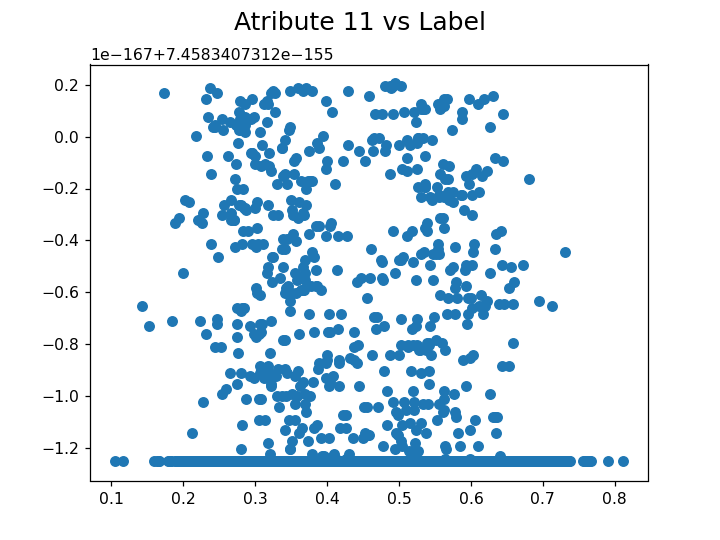

<IPython.core.display.Javascript object>


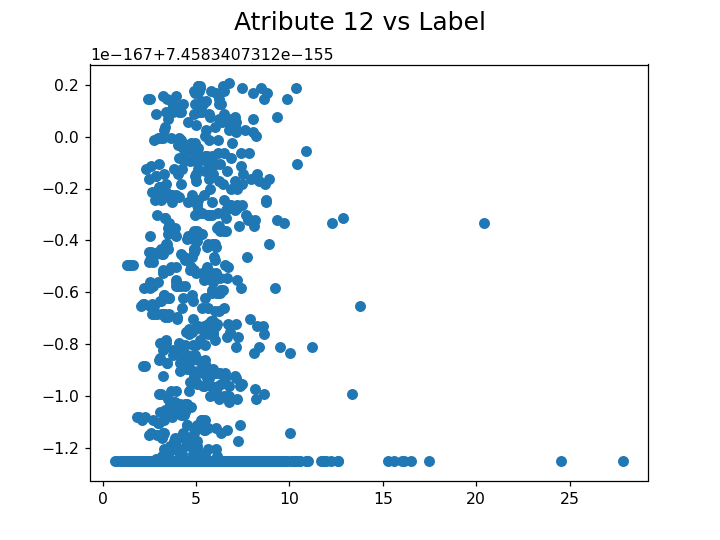

<IPython.core.display.Javascript object>


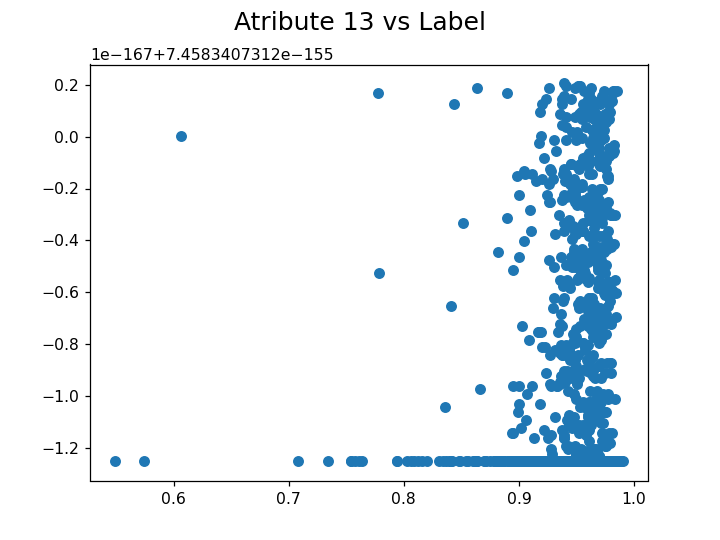

In [64]:
fig, axes = plt.subplots(7,2,figsize=(10,20))
ax = axes.ravel()
for i in range(14):
    plt.figure()
    plt.suptitle('Atribute '+ str(i) +' vs Label', fontsize=16)
    plt.scatter(x[:,i], y)

fig.tight_layout()